In [198]:
import math 
import array as arr
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [199]:
g=9.81
vt=30
CD=1.0/40
CL=1.0

theta0=np.deg2rad(0)
v0=vt
x0=0
y0=1000

T=100.0
dt=0.1
N=int(T/dt)+1

u=np.empty((N, 4))
u[0]=np.array([v0, theta0, x0, y0])

In [200]:
def rhs_phugoid(u, CL, CD, g, vt):
    [v, theta, x, y] = u
    rhs=np.array([-g*np.sin(theta)-CD/CL*g*v*v/vt**2, -g*np.cos(theta)/v+g*v/vt**2, v*np.cos(theta), v*np.sin(theta)])
    return rhs 

In [201]:
def euler_step(u, f, dt, *args):
    u_new=u+dt*f(u, *args)
    return u_new


In [202]:
for n in range (N-1):
    u[n+1]=euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

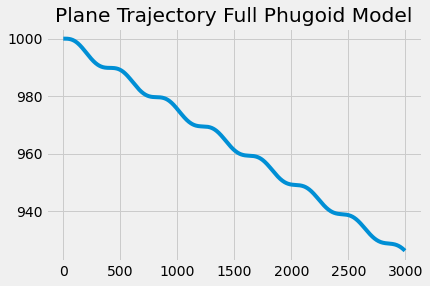

In [203]:
x=u[:, 2]
y=u[:, 3]
pyplot.style.use('fivethirtyeight')
pyplot.title('Plane Trajectory Full Phugoid Model')
pyplot.plot(x, y, label='Plane Trajectory')

In [204]:
dt_values=[0.1, 0.05, 0.01, 0.005, 0.001]
u_values=[]
for dt in dt_values:
    N=int(T/dt)+1
    u=np.empty((N, 4))
    u[0]=np.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1]=euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values.append(u)

In [205]:
def l1_diff(u_coarse, u_fine, dt):
    N_coarse=len(u_coarse)
    N_fine=len(u_fine)
    ratio=math.ceil(N_fine/N_coarse)
    diff=dt*(np.sum(np.abs(u_coarse - u_fine[::ratio])))
    return diff

In [206]:
diff_values=[]
for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:,2], u_values[-1][:,2], dt)
    diff_values.append(diff)
u_values[i][:,2]

array([0.00000000e+00, 1.50000000e-01, 2.99993869e-01, ...,
       2.99676539e+03, 2.99691466e+03, 2.99706393e+03])

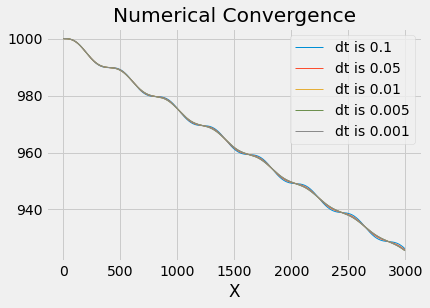

In [207]:
pyplot.title('Numerical Convergence')
pyplot.xlabel('X')
pyplot.rcParams['lines.linewidth']=1

    

pyplot.plot(u_values[0][:,2], u_values[0][:,3], label='dt is 0.1')
pyplot.plot(u_values[1][:,2], u_values[1][:,3], label='dt is 0.05')
pyplot.plot(u_values[2][:,2], u_values[2][:,3], label='dt is 0.01')
pyplot.plot(u_values[3][:,2], u_values[3][:,3], label='dt is 0.005')
pyplot.plot(u_values[4][:,2], u_values[4][:,3], label='dt is 0.001')
pyplot.legend()

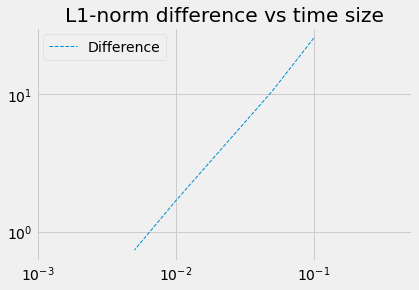

In [208]:
pyplot.title('L1-norm difference vs time size')
#pyplot.plot(dt_values[:-1], diff_values, label='Difference',linestyle='--')
pyplot.loglog(dt_values[:-1], diff_values, label='Difference',linestyle='--')
pyplot.legend()
pyplot.axis('equal');

In [254]:
r=2
h=0.001
dt_values2=[h, r*h, r**2*h]
u_values2=[]
dt_values2



[0.001, 0.002, 0.004]

In [255]:
for dt in dt_values2:
    N=int(T/dt)+1
    u=np.empty((N, 4))
    u[0]=np.array([v0, theta0, x0, y0])
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values2.append(u)

print(len(u_values2[2][:,2]))
print(len(u_values2[1][:,2]))
print(len(u_values2[0][:,2]))

z=u_values2[0][:,2]
print(len(z[::981]))

25001
50001
100001
102


In [256]:
f2_f1=l1_diff(u_values2[1][:,2], u_values2[0][:,2], dt_values2[1])
f3_f2=l1_diff(u_values2[2][:,2], u_values2[1][:,2], dt_values2[2])
p = math.log(f3_f2 / f2_f1) / math.log(r)
p

1.0138040951981893